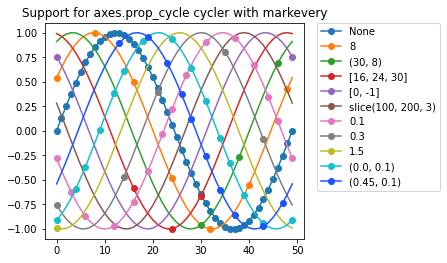

In [1]:
from cycler import cycler
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Define a list of markevery cases and color cases to plot
cases = [None,
         8,
         (30, 8),
         [16, 24, 30],
         [0, -1],
         slice(100, 200, 3),
         0.1,
         0.3,
         1.5,
         (0.0, 0.1),
         (0.45, 0.1)]

colors = ['#1f77b4',
          '#ff7f0e',
          '#2ca02c',
          '#d62728',
          '#9467bd',
          '#8c564b',
          '#e377c2',
          '#7f7f7f',
          '#bcbd22',
          '#17becf',
          '#1a55FF']

# Configure rcParams axes.prop_cycle to simultaneously cycle cases and colors.
mpl.rcParams['axes.prop_cycle'] = cycler(markevery=cases, color=colors)

# Create data points and offsets
x = np.linspace(0, 2 * np.pi)
offsets = np.linspace(0, 2 * np.pi, 11, endpoint=False)
yy = np.transpose([np.sin(x + phi) for phi in offsets])

# Set the plot curve with markers and a title
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])

for i in range(len(cases)):
    ax.plot(yy[:, i], marker='o', label=str(cases[i]))
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title('Support for axes.prop_cycle cycler with markevery')

plt.show()

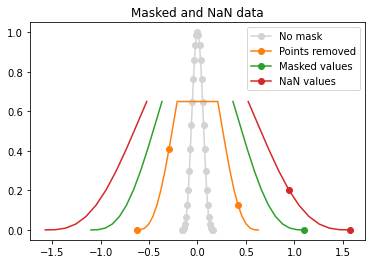

In [2]:
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-np.pi/2, np.pi/2, 31)
y = np.cos(x)**3

# 1) remove points where y > 0.7
x2 = x[y <= 0.7]
y2 = y[y <= 0.7]

# 2) mask points where y > 0.7
y3 = np.ma.masked_where(y > 0.7, y)

# 3) set to NaN where y > 0.7
y4 = y.copy()
y4[y3 > 0.7] = np.nan

plt.plot(x*0.1, y, 'o-', color='lightgrey', label='No mask')
plt.plot(x2*0.4, y2, 'o-', label='Points removed')
plt.plot(x*0.7, y3, 'o-', label='Masked values')
plt.plot(x*1.0, y4, 'o-', label='NaN values')
plt.legend()
plt.title('Masked and NaN data')
plt.show()

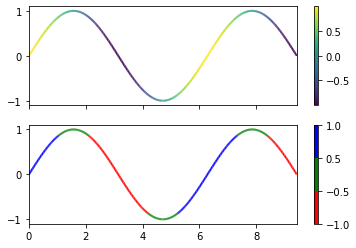

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()

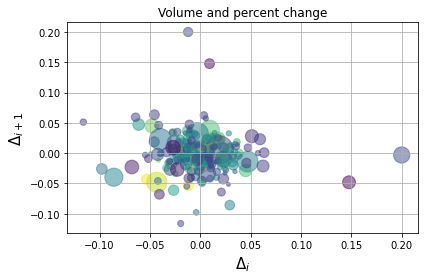

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
price_data = (cbook.get_sample_data('goog.npz', np_load=True)['price_data']
              .view(np.recarray))
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

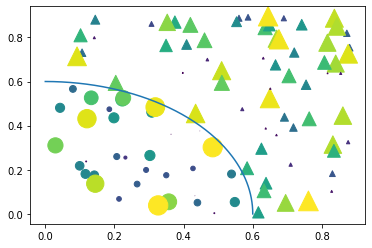

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


N = 100
r0 = 0.6
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)
area = (20 * np.random.rand(N))**2  # 0 to 10 point radii
c = np.sqrt(area)
r = np.sqrt(x ** 2 + y ** 2)
area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)
plt.scatter(x, y, s=area1, marker='^', c=c)
plt.scatter(x, y, s=area2, marker='o', c=c)
# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()

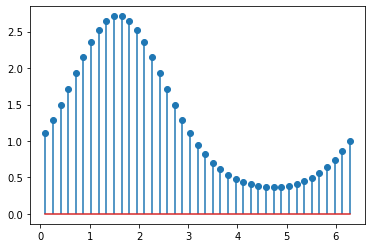

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.1, 2 * np.pi, 41)
y = np.exp(np.sin(x))

plt.stem(x, y)
plt.show()

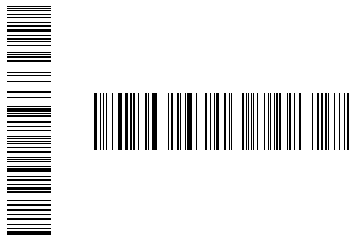

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# the bar
x = np.random.rand(500) > 0.7

barprops = dict(aspect='auto', cmap='binary', interpolation='nearest')

fig = plt.figure()

# a vertical barcode
ax1 = fig.add_axes([0.1, 0.1, 0.1, 0.8])
ax1.set_axis_off()
ax1.imshow(x.reshape((-1, 1)), **barprops)

# a horizontal barcode
ax2 = fig.add_axes([0.3, 0.4, 0.6, 0.2])
ax2.set_axis_off()
ax2.imshow(x.reshape((1, -1)), **barprops)

plt.show()

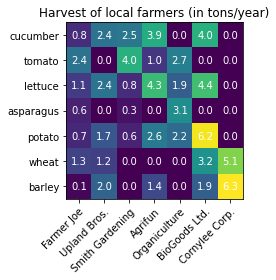

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

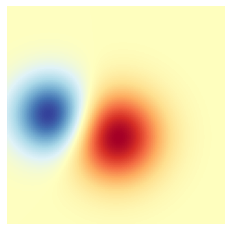

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


def normal_pdf(x, mean, var):
    return np.exp(-(x - mean)**2 / (2*var))


# Generate the space in which the blobs will live
xmin, xmax, ymin, ymax = (0, 100, 0, 100)
n_bins = 100
xx = np.linspace(xmin, xmax, n_bins)
yy = np.linspace(ymin, ymax, n_bins)

# Generate the blobs. The range of the values is roughly -.0002 to .0002
means_high = [20, 50]
means_low = [50, 60]
var = [150, 200]

gauss_x_high = normal_pdf(xx, means_high[0], var[0])
gauss_y_high = normal_pdf(yy, means_high[1], var[0])

gauss_x_low = normal_pdf(xx, means_low[0], var[1])
gauss_y_low = normal_pdf(yy, means_low[1], var[1])

weights = (np.outer(gauss_y_high, gauss_x_high)
           - np.outer(gauss_y_low, gauss_x_low))

# We'll also create a grey background into which the pixels will fade
greys = np.full((*weights.shape, 3), 70, dtype=np.uint8)

# First we'll plot these blobs using ``imshow`` without transparency.
vmax = np.abs(weights).max()
imshow_kwargs = {
    'vmax': vmax,
    'vmin': -vmax,
    'cmap': 'RdYlBu',
    'extent': (xmin, xmax, ymin, ymax),
}

fig, ax = plt.subplots()
ax.imshow(greys)
ax.imshow(weights, **imshow_kwargs)
ax.set_axis_off()